<a href="https://colab.research.google.com/github/melvin-02/Cat_Dog_CNN/blob/master/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/My Drive/PetImages.zip'

In [ ]:
import tensorflow as tf


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input, Flatten, MaxPooling2D, Dropout, Conv2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
# Delete corrupted images
import os

num_skipped = 0
for folder_name in ("Testing", "Training", "Validation"):
  for sub_folder in ("Cat", "Dog"):
      folder_path = os.path.join("/content/PetImages", folder_name, sub_folder )
      for fname in os.listdir(folder_path):
          fpath = os.path.join(folder_path, fname)
          try:
              fobj = open(fpath, "rb")
              is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
          finally:
              fobj.close()

          if not is_jfif:
              num_skipped += 1
              # Delete corrupted image
              os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


In [ ]:
# Check number of images in each folder after deletion
import os, os.path

for folder_name in ("Testing", "Training", "Validation"):
  for sub_folder in ("Cat", "Dog"):
    DIR = os.path.join("/content/PetImages", folder_name, sub_folder )
    print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

1400
1406
7533
7473
2808
2790


In [ ]:
i = Input(shape=(128, 128, 3))
x = Conv2D(32, (3,3), padding='same', activation='relu')(i)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1/255.0,
                                   width_shift_range = 0.1,
                                   height_shift_range =0.1,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1/255.0)

test_datagen = ImageDataGenerator(rescale=1/255.0)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/PetImages/Training',
                                                 target_size=(128, 128),
                                                 class_mode = 'binary',
                                                 batch_size = 32)

validation_set = validation_datagen.flow_from_directory('/content/PetImages/Validation',
                                                target_size = (128, 128),
                                                class_mode = 'binary',
                                                batch_size =32,
                                                shuffle= False)

test_set = test_datagen.flow_from_directory('/content/PetImages/Testing',
                                            target_size = (128,128),
                                            class_mode='binary',
                                            batch_size = 1,
                                            shuffle=False)


Found 15006 images belonging to 2 classes.
Found 5598 images belonging to 2 classes.
Found 2806 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(training_set,
                        steps_per_epoch = len(training_set.filenames)//32,
                        epochs = 25,
                        validation_data = validation_set,
                        validation_steps=len(validation_set.filenames) // 32
                        )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
468/468 [==============================] - 117s 251ms/step - loss: 0.6365 - accuracy: 0.6195 - val_loss: 0.5555 - val_accuracy: 0.7098
Epoch 2/25
468/468 [==============================] - 118s 252ms/step - loss: 0.5531 - accuracy: 0.7132 - val_loss: 0.4883 - val_accuracy: 0.7672
Epoch 3/25
468/468 [==============================] - 116s 248ms/step - loss: 0.5063 - accuracy: 0.7558 - val_loss: 0.4414 - val_accuracy: 0.7956
Epoch 4/25
468/468 [==============================] - 118s 251ms/step - loss: 0.4653 - accuracy: 0.7778 - val_loss: 0.4037 - val_accuracy: 0.8145
Epoch 5/25
468/468 [==============================] - 116s 249ms/step - loss: 0.4280 - accuracy: 0.8003 - val_loss: 0.3994 - val_accuracy: 0.8238
Epoch 6/25
468/468 [==============================] - 115s 246ms/step - loss: 0.4123 - accuracy: 0.8131 - val_loss: 0.3625 - val_accuracy: 0.8396
Epoch 7/25
468/468 [============================

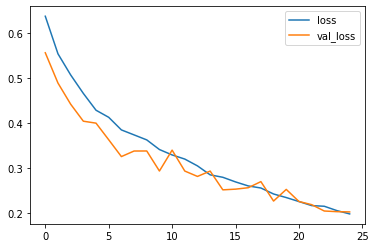

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

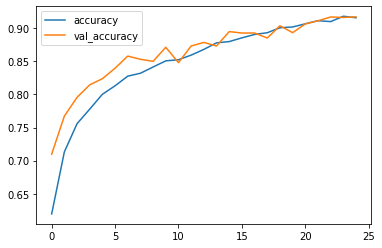

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [ ]:
model.save('/content/drive/My Drive/CatDog92.h5', )

In [ ]:
model.evaluate_generator(test_set)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.1997358798980713, 0.9233784675598145]

In [ ]:
probabilities = model.predict_generator(test_set)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
from sklearn.metrics import confusion_matrix

y_true = np.array([0] * 1400 + [1] * 1406)
y_pred = probabilities > 0.5

confusion_matrix(y_true, y_pred)

array([[1287,  113],
       [ 102, 1304]])

This image is 0.01 percent cat and 99.99 percent dog.


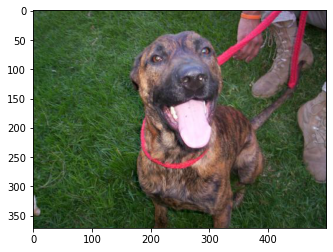

In [ ]:
# See random test results
import random
import matplotlib.image as mpimg
index = random.choice(range( len(probabilities)))
probability = probabilities[index]
image_path = '/content/PetImages/Testing' + '/' + test_set.filenames[index]
img = mpimg.imread(image_path)
plt.imshow(img)
print("This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - probability[0]), 100 * probability[0]))
plt.show()

In [ ]:
import tensorflow
model = tensorflow.keras.models.load_model('/content/drive/My Drive/CatDog92.h5')

In [ ]:
# Model Deployment
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(128, 128))
  
  x=image.img_to_array(img)
  x = x/255.0
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict_generator(images)
  
  if classes[0]>0.5:
    print(classes[0] *100)
    print(fn + " is a dog")
    
  else:
    print((1-classes[0]) *100)
    print(fn + " is a cat")
 